In [64]:
import pandas as pd
from datetime import datetime
import  matplotlib.pyplot as plt
import holidays

In [65]:
veri = pd.read_excel("dolar_satıs_evds16.xlsx")
verieksik = pd.read_excel("dolarsatiseksik.xlsx")

In [66]:
print(veri)
print(verieksik)

          Tarih    Dolar
0    02-01-2020   5.9507
1    03-01-2020   5.9585
2    06-01-2020   5.9734
3    07-01-2020   5.9766
4    08-01-2020   5.9701
..          ...      ...
861  06-06-2023  21.1846
862  07-06-2023  21.4952
863  08-06-2023  23.0625
864  09-06-2023  23.3632
865  12-06-2023  23.4736

[866 rows x 2 columns]
           Tarih    Dolar
0     01-01-2020      NaN
1     02-01-2020   5.9507
2     03-01-2020   5.9585
3     04-01-2020      NaN
4     05-01-2020      NaN
...          ...      ...
1254  08-06-2023  23.0625
1255  09-06-2023  23.3632
1256  10-06-2023      NaN
1257  11-06-2023      NaN
1258  12-06-2023  23.4736

[1259 rows x 2 columns]


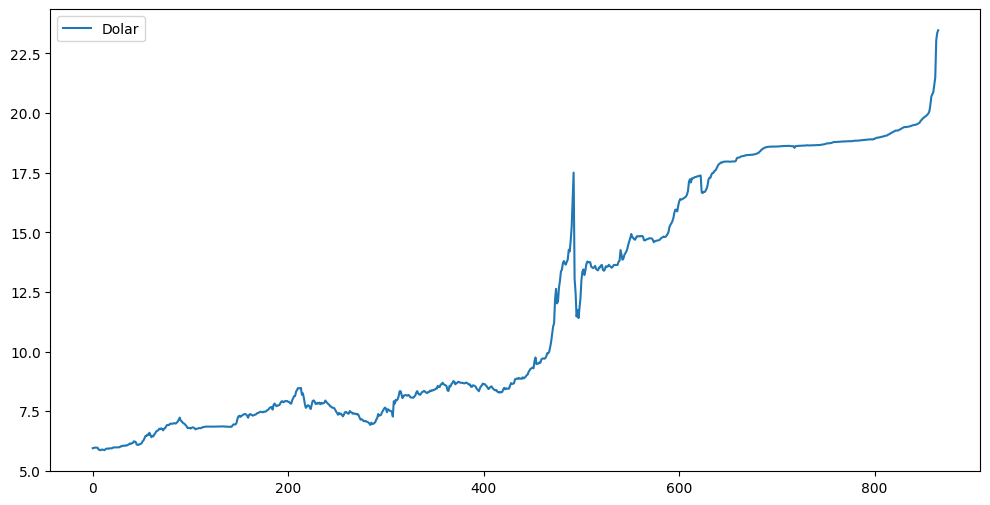

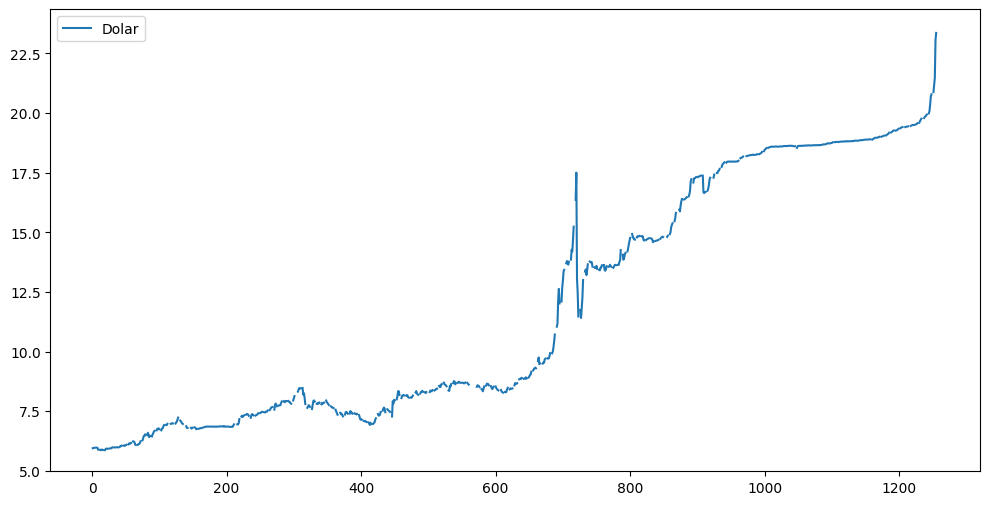

In [67]:
veri.plot(figsize=(12, 6))
verieksik.plot(figsize=(12, 6))

plt.show()


In [68]:
print(veri.isnull().sum())
print(verieksik.isnull().sum())

Tarih    0
Dolar    0
dtype: int64
Tarih      0
Dolar    393
dtype: int64


In [69]:
import datetime
tarihler = []

for i in verieksik["Tarih"]:
    tarihler.append(datetime.datetime.strptime(i, "%d-%m-%Y"))
verieksik["Tarih"] =tarihler
print(verieksik.dtypes)

Tarih    datetime64[ns]
Dolar           float64
dtype: object


In [70]:
tarih = "12.09.2024"
tarih_obje = datetime.datetime.strptime(tarih, "%d.%m.%Y")
saat_dilimi =datetime.timezone(datetime.timedelta(hours =3))
tarih_obje = tarih_obje.astimezone(saat_dilimi)
gun =tarih_obje.strftime("%A")
print(gun)

Thursday


In [94]:
#import datetime
#tarihler = []
#gunler = []

#for i in verieksik["Tarih"]:
    #tarih_obje = datetime.datetime.strptime(i, "%d-%m-%Y")
    #saat_dilimi =datetime.timezone(datetime.timedelta(hours =3))
    #tarih_obje = tarih_obje.astimezone(saat_dilimi)
    #gun =tarih_obje.strftime("%A")
    #gunler.append(gun)
    
#verieksik["Tarih"] =tarihler
#verieksik["Günler"] =gunler

#verieksik =veri[["Tarih","Günler","Dolar"]]
#print(verieksik)

In [73]:
import datetime

tarihler = []
gunler = []

for i in verieksik["Tarih"]:
    # i zaten bir Timestamp objesi olduğu için strptime'e gerek yok
    saat_dilimi = datetime.timezone(datetime.timedelta(hours=3))
    tarih_obje = i.tz_localize(datetime.timezone.utc).astimezone(saat_dilimi)  # Zaman dilimini ayarlama
    gun = tarih_obje.strftime("%A")
    gunler.append(gun)
    
verieksik["Günler"] = gunler

verieksik = verieksik[["Tarih", "Günler", "Dolar"]]
print(verieksik)


          Tarih     Günler    Dolar
0    2020-01-01  Wednesday      NaN
1    2020-01-02   Thursday   5.9507
2    2020-01-03     Friday   5.9585
3    2020-01-04   Saturday      NaN
4    2020-01-05     Sunday      NaN
...         ...        ...      ...
1254 2023-06-08   Thursday  23.0625
1255 2023-06-09     Friday  23.3632
1256 2023-06-10   Saturday      NaN
1257 2023-06-11     Sunday      NaN
1258 2023-06-12     Monday  23.4736

[1259 rows x 3 columns]


In [74]:
eksik_gozlemler = verieksik[verieksik["Dolar"].isnull()]
eksik_gozlemler =eksik_gozlemler["Günler"].value_counts()
print(eksik_gozlemler)

Günler
Saturday     180
Sunday       180
Friday        10
Thursday       6
Tuesday        6
Monday         6
Wednesday      5
Name: count, dtype: int64


**Hafta sonu verilerinin NaN olmasının nedeni borsanın kapalı olmasıdır. Hafta içi günlerde NaN olan değerler ise ya eksik veri bulunduğunu ya da resmi tatil günlerini işaret eder.**

In [75]:
import datetime
tarih =datetime.datetime(2024,9,12)

In [81]:
tatil_list = []
tatil = holidays.Turkey()

In [83]:
if tarih in tatil:
    print("Resmi tatil")
else:
    print("Resmi tatil değildir")

Resmi tatil


In [84]:
tarih =datetime.datetime(2024,8,30)

In [85]:
if tarih in tatil:
    print("Resmi tatil")
else:
    print("Resmi tatil değildir")

Resmi tatil


In [90]:
import holidays

tatil_list = []  # Tatil bilgilerini saklamak için liste
tatil = holidays.Turkey()  # Türkiye resmi tatilleri

# Her bir tarih için kontrol yaparak tatil bilgilerini ekle
for i in verieksik["Tarih"]:
    if i in tatil:
        tatil_list.append("Resmi Tatil")
    else:
        tatil_list.append("Resmi Tatil Değildir")

# Tatil listesini verieksik DataFrame'ine ekle
verieksik["Tatil"] = tatil_list

print(verieksik)


          Tarih     Günler    Dolar                 Tatil
0    2020-01-01  Wednesday      NaN           Resmi Tatil
1    2020-01-02   Thursday   5.9507  Resmi Tatil Değildir
2    2020-01-03     Friday   5.9585  Resmi Tatil Değildir
3    2020-01-04   Saturday      NaN  Resmi Tatil Değildir
4    2020-01-05     Sunday      NaN  Resmi Tatil Değildir
...         ...        ...      ...                   ...
1254 2023-06-08   Thursday  23.0625  Resmi Tatil Değildir
1255 2023-06-09     Friday  23.3632  Resmi Tatil Değildir
1256 2023-06-10   Saturday      NaN  Resmi Tatil Değildir
1257 2023-06-11     Sunday      NaN  Resmi Tatil Değildir
1258 2023-06-12     Monday  23.4736  Resmi Tatil Değildir

[1259 rows x 4 columns]


C:\Users\1\AppData\Local\Temp\ipykernel_14648\2533300201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verieksik["Tatil"] = tatil_list


In [93]:
tatil_list = []  # Tatil bilgilerini saklamak için liste
tatil = holidays.Turkey()  # Türkiye resmi tatilleri

# Her bir tarih için kontrol yaparak tatil bilgilerini ekle
for i in verieksik["Tarih"]:
    if i in tatil:
        tatil_list.append("Resmi Tatil")
    else:
        tatil_list.append("Resmi Tatil Değildir")

# Tatil listesini verieksik DataFrame'ine ekle
verieksik["Tatil"] = tatil_list

verieksik = verieksik[~verieksik["Günler"].isin(["Saturday", "Sunday"])]

eksik_gozlemler = verieksik[verieksik["Dolar"].isnull()]
eksik_gozlemler= eksik_gozlemler["Tatil"].value_counts()

print(verieksik.isnull().sum())
print(eksik_gozlemler)

Tarih      0
Günler     0
Dolar     33
Tatil      0
dtype: int64
Tatil
Resmi Tatil    33
Name: count, dtype: int64


**Burada eksik gözlem sayısının yalnızca resmi tatilleri göstermesi, eksik gözlem olmadığını söyleyebileceğimiz anlamına gelir**